### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

**a) диагональная, ортогональная, но не единичная(!)**

Диагональная - значит все элементы, кроме главной диагонали равы 0.
Ортогональная - значит при умножении матрицы на ее же транспонированнную получится единичная матрица.
Единичная матрица - квадратная диагональная у которой элементы главной диагонали равны 1.

При умножении диагональных матриц элементы главной диагонали перемножаются.

Получается, что главная диагональ должна состоять из элементов, которые при умножении сами на себя дают 1. Для любого элемента $x$ должно быть верно: $x^{2}=1$ Решения уравнения 1 и -1. То есть, элементы главной диагонали должны содержать 1 и -1 в произвольном распределении, но -1 обязательно должны быть согласно условию.

In [2]:
m_0 = np.diag([-1,1,-1])
print(m_0)

[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [3]:
np.dot(m_0.T, m_0)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

**b) верхнетреугольная, ортогональная**

Чтобы не искать методом "научного тыка", выведем зависимость. Обозначим элементы матрицы a, b, c, d. Тогда:

In [4]:
m_1 = np.array([['a','b'], ['c','d']])
print(m_1)

[['a' 'b']
 ['c' 'd']]


In [5]:
print(m_1.T)

[['a' 'c']
 ['b' 'd']]


In [6]:
print(np.array([ ['a^2+b^2','ac+bd'], ['ac+bd', 'c^2+d^2'] ]))

[['a^2+b^2' 'ac+bd']
 ['ac+bd' 'c^2+d^2']]


Из условия ортогональности получается следующая система:
$$a^{2} + b^{2} = 1$$
$$ac + bd = 0$$
$$c^{2} + d^{2} = 1$$

Из уравнения 1: 
- либо $a=0, b=1 (b=-1)$, 
- либо $a=1 (a=-1), b=0$, 
- либо $a=b=(+-1/2)^{1/2}$
Аналогично для: 
- $c$ и $d$
Из уравнения 2: 
- либо $ac=-bd$ 
- либо в каждом из произведений один из членов равен 0. 
Из условия треугольности: 
- $b!=0$ , при этом $c=0$

In [7]:
m_1 = np.array([ [0, -1], [0, -1] ])
print(m_1)

[[ 0 -1]
 [ 0 -1]]


In [8]:
np.dot(m_1, m_1.T)

array([[1, 1],
       [1, 1]])

Из указаных условий наиболее близок вариант выше, но всем условиям он не соответствует. А именно, матрица не ортогональная, при умножении на саму себя транспонированную дает матрицу из единиц, но не единичную матрицу. 

**c) нижнетреугольная, ортогональная:**

Рассуждения относительно нижнетреугольной аналогичны. В итоге, хотя бы одно из условий не выполняется. Вот вариант, который ортогонален, но при этом не треугольный.

In [9]:
m_2 = np.array([[0, -1], [-1, 0] ])
print(m_2)

[[ 0 -1]
 [-1  0]]


In [10]:
np.dot(m_2, m_2.T)

array([[1, 0],
       [0, 1]])

In [11]:
# Встроенная функция для создания треугольных матриц дает вот такой результат
m_2 = np.tril([[0, -1], [-1, 0]], 0 )
print(m_2)

[[ 0  0]
 [-1  0]]


In [12]:
np.dot(m_2, m_2.T)

array([[0, 0],
       [0, 1]])

**d) матрица, у которой определитель = 1, и все элементы не равны 0**

In [13]:
m_3 = np.array([ [1, 2], [-1.5, -2] ])
m_3

array([[ 1. ,  2. ],
       [-1.5, -2. ]])

In [14]:
np.linalg.det(m_3)

1.0

Если решать на бумаге, то получается:
$$1*(-2) - 2*(-1.5) = -2 + 3 = 1$$

**e) матрица (3x3), у которой определитель = 1**

Если не искать долгим путем, то достаточно, чтобы произведение элементов глвной диагонали равнялось 1, произведение элементов главного треугольника равнялось 0, произведение элементов побочной диагоноли равнялось 0 и элементов побочного треугольника равнялось 0.

In [15]:
m_4 = np.array([ [1, 0, -1 ], [1, -1, 1], [0, 0, -1] ])
m_4

array([[ 1,  0, -1],
       [ 1, -1,  1],
       [ 0,  0, -1]])

In [16]:
np.linalg.det(m_4)

1.0

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [17]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [18]:
#  Характеристический многочлен
m_char = np.array([ ['2-x', 2], [1, '3-x']])
print(m_char)

[['2-x' '2']
 ['1' '3-x']]


Решая уравнение:
$$(2-x)*(3-x) - 2 =0 $$
$$6 - 5x + x^{2} - 2 = 0$$
$$x^{2} - 5x + 4 = 0$$
$$D = 25 - 16 = 9$$
$$x1 = (5 + 3) /2 = 4$$
$$x2 = (5 - 3) /2 = 1$$
Собственные значения: 1 , 4

Найдем собственные векторы. 
Получим матрицу коэффициентов для первого собственного значения **1**

In [19]:
np.array([ [1, 2], [1, 2] ])

array([[1, 2],
       [1, 2]])

Из системы:
$$x + 2y = 0$$
$$x + 2y = 0$$
Получается, что $x = -2y$

Собственных векторов с таким условием бесконечное множество, возьмем тот, который соответствует принятым критериям - **х** положительный, целый, минимальный, а **у** недробный.

Первый собственный вектор:
$$(2,-1)$$

Получим матрицу коэффициентов для второго собственного значения **4**

In [20]:
np.array([[-2, 2], [1, -1] ])

array([[-2,  2],
       [ 1, -1]])

Из системы:
$$-2x + 2y = 0$$
$$x - y = 0$$
Получается, что $x=y$

Аналогично, собственных векторов с таким условием бесконечно много, выберем аналогично условиям выше. 

Второй собственный вектор: $$(1,1)$$

**Выполним проверку полученных собственных значений и векторов по определению:**
- Проверим визуально результат умножения матрицы на первый собственный вектор (2,-1);
- Проверим по определению равенство скалярного произведения матрицы на собственный вектор с одной стороны и собственного значения на собственный вектор с другой;

In [21]:
v1 = [2, -1]
v2 = [1, 1]
w1 = 1
w2 = 4

In [22]:
np.dot(m,v1)

array([ 2, -1])

In [23]:
np.dot(m, v1) == w1 * v1

array([ True,  True])

In [24]:
np.dot(m,v2) / w2 == v2

array([ True,  True])

Найдем собственные значения и векторы используя библиотеку **linalg**:

In [25]:
w,v = np.linalg.eig(m)

In [26]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719 -0.70710678]
Собственное значение 4.0
соответствующий ему собственный вектор [ 0.4472136  -0.70710678]


In [27]:
np.dot(m, v[0])

array([-3.20306794, -3.01574753])

In [28]:
v[0]

array([-0.89442719, -0.70710678])

По собственным значениям расчеты совпали. С собственными векторами у **linalg** свой метод их определения. Если визуально проверить выполнение определения для собственного значения **1**, то численно они должны быть равны (умножение на 1), но это равенство не соблюдается.

**Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy**

In [29]:
mm = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(mm)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [30]:
#  Характеристический многочлен
mm_char = np.array([ ['4-x', 1, -1], [1, '4-x', -1], [-1, -1, '4-x'] ])
print(m_char)

[['2-x' '2']
 ['1' '3-x']]


Ищем собственные значения:

$$(4-x)^{3} + (1*-1*-1) + (1*-1*-1) - ((4-x)*-1*-1 + (4-x)*-1*-1 + (4-x)*1*1)$$
$$(4-x)^{3} + 2 - (4-x)*3$$
$$(4-x)((4-x)^{2} + 3x - 10)$$
$$(4-x)(x^{2} - 8x + 16 + 3x - 10)$$
$$(4-x)(x^{2} - 5x + 6)$$
$$D = 25 - 24 = 1$$
Из первого множителя (многочлен первой степени):
$$ x1 = 4$$
Из второго множителя (многочлен второй степени):
$$ x2 = (5 + 1)/2 = 3$$
$$ x3 = (5-1)/2 = 2$$
Собственные значения:
* __2__ 
* __3__ 
* __4__


**Ищем собственный вектор для первого собственного значения 2** 
решаем систему уравнений:
$$ 2x + y -z = 0 $$
$$ x + 2y -z = 0 $$
$$ -x -y + 2z = 0 $$
Из второго уравнения:
$$ x = z - 2y $$
Подставляем в первое и третье:
$$ 2z - 4y + y - z = 0 $$
$$ 2y - z -y +2z = 0 $$

$$ z - 3y = 0 $$
$$ y + z =0 $$

Получается:
$$ y = -z$$
$$ z = 3y$$
Этому удовлетворяет только тривиальное решение **z=0** и **y=0** и **x=0**, что получаем, подставляя для **x = z - 2y** 

Тривиальое решение нас не удовлетворяет. Попробуем другой способ. Сложив первые два уравнения получим:
$$ 3x + 3y = 0$$
$$ -x -y + 2z = 0$$
Умножим нижнее на 3 и сложим с верхним:
$$ 6z=0$$
$$ z=0$$
$$ x=-y$$
Получается снова только тривальное решение.

**Ищем собственный вектор для второго собственного значения 3** 
решая систему уравнений:
$$ x + y -z = 0 $$
$$ x + y -z = 0 $$
$$ -x -y + z = 0 $$
Получается, что:
$$ z = x + y $$
Данному условию удовлетворяют множество векторов, возьмем **(1, 1, 2)**

**Ищем собственный вектор для второго собственного значения 4** 
решая систему уравнений:
$$ 0x + y - z = 0 $$
$$ x + 0y - z = 0 $$
$$ -x - y + 0z = 0 $$
Откуда:
$$ y=z $$
$$ x=z $$
$$ x=-y $$
Этим условиям соответствует только тривиальное решение **(0, 0, 0)**

**Выполним проверку полученных собственных значении и векторов на соответствие определению.** 
Для тривиального решения (0,0,0) выполнение очевидно, проверим для собственного значение **3** и собственного вектора **(1, 1, 2)**

In [31]:
w = [2, 3, 4]
v = [ [0, 0, 0], [1, 1, 2], [0, 0, 0] ]

In [32]:
np.dot(mm,v[0])

array([0, 0, 0])

In [33]:
print( np.dot(mm,v[1]) / w[1] == v[1] )

[ True  True  True]


Найдем собственные значения и собственные векторы с применением бибилотеки **linalg**

In [34]:
w,v = linalg.eig(mm)
print(w)

[3.+0.j 6.+0.j 3.+0.j]


In [35]:
v

array([[-0.81649658,  0.57735027, -0.27658128],
       [ 0.40824829,  0.57735027,  0.8035929 ],
       [-0.40824829, -0.57735027,  0.52701162]])

In [36]:
print (np.dot(mm,v) == w * v)

[[False  True False]
 [False False False]
 [False False  True]]


Как и с матрицей 2х2 у библиотеки **linalg** свой метод поиска собственых значений и векторов.

### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [37]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [38]:
a, U = np.linalg.eig(m)
print('Eigenvalues','\n', a)
print('\n','Eigenvectors','\n', U)

Eigenvalues 
 [-0.23606798  4.23606798]

 Eigenvectors 
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [39]:
D = np.diag(a)

print(D, '\n', U, '\n', U.T)

[[-0.23606798  0.        ]
 [ 0.          4.23606798]] 
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]] 
 [[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [40]:
U * D * U.T

array([[-0.17082039, -0.        ],
       [-0.        ,  3.06524758]])

### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [41]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [42]:
X, y = load_digits(return_X_y=True)

In [43]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


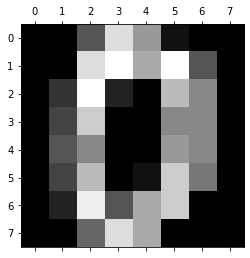

In [44]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [45]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668958923495

In [46]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.7974401780745687

In [47]:
def oob_scor(image, n_components):
    from sklearn.decomposition import TruncatedSVD
    from sklearn.ensemble import RandomForestClassifier
    ratio = []
    for i in n_components:
        svd = TruncatedSVD(n_components=5)
        X_reduced = svd.fit_transform(X)
        rf_reduced = RandomForestClassifier(oob_score=True)
        rf_reduced.fit(X_reduced, y)
        ratio.append(rf_reduced.oob_score_)
    return ratio

In [48]:
components = np.linspace(50,5,10)
components

array([50.00, 45.00, 40.00, 35.00, 30.00, 25.00, 20.00, 15.00, 10.00,
       5.00])

In [49]:
print(oob_scor(image, components))

[0.8024485253199778, 0.8013355592654424, 0.7941012799109627, 0.806900389538119, 0.8046744574290484, 0.8030050083472454, 0.8024485253199778, 0.7813021702838063, 0.796883695047301, 0.8074568725653868]


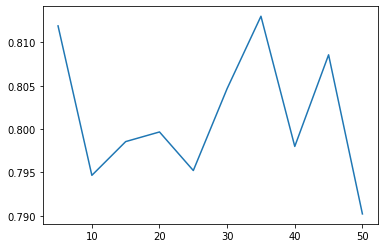

In [50]:
plt.plot(components, oob_scor(image, components))
plt.show()